# Регрессия - пора творить!

Если вы дошли до этой практики и выполнили все предыдущие - вау! Аплодисменты вам!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/leo.png" width=500/></p>



Тем не менее, не время расслабляться! На этот раз мы не будем рассказывать вам новый материал - лишь дадим пару напутствий и пожелаем успехов и сил!

В этот раз вам предлагается разработать модель предсказания цены домов по набору данных Boston Houses Pricing. Мы его уже немного пощупали в прошлой практике, но в этой вам предстоит сделать всё самостоятельно и на полных данных!

Что надо будет сделать:
- загрузить данные;
- посмотреть и размер, и примеры данных;
- проверить количество пропусков в данных;
    - убедиться, что пропусков в данных нет и можно строить **baseline**;
- разделить данные на train и test;
    - Делаем это один раз! Все дальнейшие модификации и улучшения должны делаться на основе единственного разделения!
    - И не забудьте зафиксировать сид! Переменную `RANDOM_SEED` мы даём ниже;
- создать baseline модель, получить метрики на тестовой выборке;
- проанализировать данные, подготовить план по очистке и предобработке данных;
- создать функцию очистки;
- произвести очистку train и test выборок -> обучаем модель с очищенными данными;
    - Снимаем метрики и так мы оцениваем влияние очистки данных на обучение;
- создать класс предобработки данных;
- сделать предобработку очищенных данных -> обучаем модель;
    - Снимаем метрики и так мы оцениваем влияние предобработки данных на обучение;

А дальше можете пофантазировать, почитать интернет и посмотреть, как улучшить метрики! 

**Ваша цель - достигнуть наилучших показателей!**

Вот вам пара идей по интересной организации предобработке:
- по признаку `CRIM` создать признак `is_CRIM`, который будет равен 1, если `CRIM` не равен 0 и 0, если `CRIM` равен нулю;
- сделать обучение модели [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), посмотреть, какие признаки имеют веса близкие к 0 и убрать их из обучения как незначимые;
- оставить только признаки с высокой корреляцией с целевой переменной;
- посмотреть, какие переменные коррелирцют между собой и оставить только единственные из пар коррелирующих;
- посмотреть, в каких примерах данных модель ошибается сильнее всего (отсортировать записи из теста по величине ошибки) и проанализировать, есть ли какая-то зависимость или шум;
- комбинировать разные подходы в зависимости от того, помогает это предсказаниям или нет.

Ещё большим плюсом будет, если вы покажете, как влияет каждый этап предобработки на результаты обучения!

Размер набора данных: (506, 14)
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Количество пропущенных значений:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
Базовый RMSE: 5.00
Базовый R²: 0.66


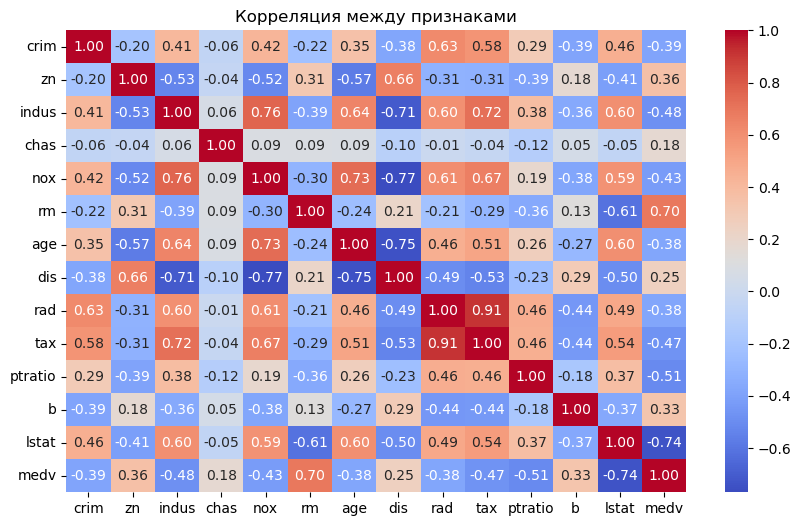

Обработанный RMSE: 5.00
Обработанный R²: 0.66
Улучшение RMSE: 0.00


In [4]:
# Зафиксируем состояние случайных чисел
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
url_dataset = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df_data = pd.read_csv(url_dataset)

print("Размер набора данных:", df_data.shape)
print(df_data.head())

print("Количество пропущенных значений:")
print(df_data.isnull().sum())

features = df_data.drop('medv', axis=1)  
target = df_data['medv']  

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(features, target, test_size=0.2, random_state=seed_value)

lasso_basic = Lasso(alpha=0.2)
lasso_basic.fit(X_train_data, y_train_data)

predictions_basic = lasso_basic.predict(X_test_data)
rmse_basic = np.sqrt(mean_squared_error(y_test_data, predictions_basic))
r2_basic = r2_score(y_test_data, predictions_basic)

print(f'Базовый RMSE: {rmse_basic:.2f}')
print(f'Базовый R²: {r2_basic:.2f}')

plt.figure(figsize=(10, 6))
sns.heatmap(df_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция между признаками')
plt.show()

def process_data(df_input):
    df_copy = df_input.copy()
    df_copy['has_CRIM'] = (df_copy['crim'] != 0).astype(int)
    return df_copy

X_train_processed = process_data(X_train_data)
X_test_processed = process_data(X_test_data)

lasso_processed = Lasso(alpha=0.2)
lasso_processed.fit(X_train_processed, y_train_data)

predictions_processed = lasso_processed.predict(X_test_processed)
rmse_processed = np.sqrt(mean_squared_error(y_test_data, predictions_processed))
r2_processed = r2_score(y_test_data, predictions_processed)

print(f'Обработанный RMSE: {rmse_processed:.2f}')
print(f'Обработанный R²: {r2_processed:.2f}')

print(f'Улучшение RMSE: {rmse_basic - rmse_processed:.2f}')

Что мы ждем от вас? 

Готовый ноутбук с таким же названием, в котором будут обязательные пункты с выводами по анализу данных и анализу поведения модели, а также дополнительные пункты с вашими мыслями и результатами улучшения модели.

Успехов вам, мы в вас верим, вы точно справитесь!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/cat-computer-peek-out-36960208.jpg" width=600/></p>